In [2]:
# importing important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [3]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading dataset
dataset=pd.read_csv("Pre_melbourn.csv")

In [5]:
dataset

,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,1035000.0,4/02/2016,2.5,3067,2.0,1.0,0,156.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,3,h,1465000.0,4/03/2017,2.5,3067,3.0,2.0,0,134.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,4,h,1600000.0,4/06/2016,2.5,3067,3.0,1.0,2,120.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,3,h,1876000.0,7/05/2016,2.5,3067,4.0,2.0,0,245.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,2,h,1636000.0,8/10/2016,2.5,3067,2.0,1.0,2,256.0,1890.0,Yarra,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8199,Wheelers Hill,4,h,1245000.0,26/08/2017,16.7,3150,4.0,2.0,2,652.0,1981.0,Melbourne,South-Eastern Metropolitan,7392
8200,Williamstown,3,h,1031000.0,26/08/2017,6.8,3016,3.0,2.0,2,333.0,1995.0,Melbourne,Western Metropolitan,6380
8201,Williamstown,3,h,1170000.0,26/08/2017,6.8,3016,3.0,2.0,4,436.0,1997.0,Melbourne,Western Metropolitan,6380
8202,Williamstown,4,h,2500000.0,26/08/2017,6.8,3016,4.0,1.0,5,866.0,1920.0,Melbourne,Western Metropolitan,6380


In [6]:
# Checking the null/Nan and missing values
dataset.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [7]:
#Checking the data types of columns in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8204 entries, 0 to 8203
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8204 non-null   object 
 1   Rooms          8204 non-null   int64  
 2   Type           8204 non-null   object 
 3   Price          8204 non-null   float64
 4   Date           8204 non-null   object 
 5   Distance       8204 non-null   float64
 6   Postcode       8204 non-null   int64  
 7   Bedroom2       8204 non-null   float64
 8   Bathroom       8204 non-null   float64
 9   Car            8204 non-null   int64  
 10  Landsize       8204 non-null   float64
 11  YearBuilt      8204 non-null   float64
 12  CouncilArea    8204 non-null   object 
 13  Regionname     8204 non-null   object 
 14  Propertycount  8204 non-null   int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 961.5+ KB


In [8]:
# describe is the predefined function used to check the important values
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount
count,8204.000000,8.204000e+03,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000
mean,2.935032,1.065839e+06,10.010227,3105.229644,2.911263,1.574720,1.588372,493.997928,1964.677962,7472.564115
std,0.979640,6.662868e+05,5.920432,90.191487,0.976463,0.704663,0.936021,993.281618,37.271727,4347.923962
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,389.000000
25%,2.000000,6.208750e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,158.000000,1940.000000,4442.000000
50%,3.000000,8.805000e+05,9.200000,3084.000000,3.000000,1.000000,1.000000,388.000000,1970.000000,6567.000000
75%,4.000000,1.320000e+06,12.900000,3148.000000,4.000000,2.000000,2.000000,640.000000,1999.000000,10331.000000
max,10.000000,9.000000e+06,47.400000,3977.000000,10.000000,8.000000,10.000000,37000.000000,2018.000000,21650.000000


In [9]:
#Splitting the columns into quantative and qualitative 
def QuanQual(dataset):
    quan=[]
    qual=[]
    for ColumnName in dataset.columns:
        #print(ColumnName)
        if (dataset[ColumnName].dtypes=='O'):
            #print("qual")
            qual.append(ColumnName)
        else:
            #print("quan")
            quan.append(ColumnName)
    return quan,qual

In [10]:
quan,qual=QuanQual(dataset)

In [11]:
quan

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'YearBuilt',
 'Propertycount']

In [12]:
qual

['Suburb', 'Type', 'Date', 'CouncilArea', 'Regionname']

## Performing the Univariate

In [13]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode",
                                "Q1:25%","Q2:50%","Q3:75%","Q4:99%","Q5:100%",
                                "IQR","1.5Rule","Lesser","Greater","Min","Max","Kurtosis","Skewness","Variance","Std_deviation"],columns=quan)

for ColumnName in quan:
    
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Median"]=dataset[ColumnName].median()
    descriptive[ColumnName]["Mode"]=dataset[ColumnName].mode()[0]
    descriptive[ColumnName]["Q1:25%"]=dataset.describe()[ColumnName]["25%"] 
    descriptive[ColumnName]["Q2:50%"]=dataset.describe()[ColumnName]["50%"]
    descriptive[ColumnName]["Q3:75%"]=dataset.describe()[ColumnName]["75%"]
    descriptive[ColumnName]["Q4:99%"]=np.percentile(dataset[ColumnName],99)
    descriptive[ColumnName]["Q5:100%"]=dataset.describe()[ColumnName]["max"]
    descriptive[ColumnName]["IQR"]= descriptive[ColumnName]["Q3:75%"]-descriptive[ColumnName]["Q1:25%"]
    descriptive[ColumnName]["1.5Rule"]=1.5*descriptive[ColumnName]["IQR"]
    descriptive[ColumnName]["Lesser"]=descriptive[ColumnName]["Q1:25%"]-descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Greater"]=descriptive[ColumnName]["Q3:75%"]+descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Min"]=dataset[ColumnName].min()
    descriptive[ColumnName]["Max"]=dataset[ColumnName].max()
    descriptive[ColumnName]["Kurtosis"]=dataset[ColumnName].kurtosis()
    descriptive[ColumnName]["Skewness"]=dataset[ColumnName].skew()
    descriptive[ColumnName]["Variance"]=dataset[ColumnName].var()
    descriptive[ColumnName]["Std_deviation"]=dataset[ColumnName].std()

In [14]:
descriptive

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount
Mean,2.935032,1065839.12433,10.010227,3105.229644,2.911263,1.57472,1.588372,493.997928,1964.677962,7472.564115
Median,3.0,880500.0,9.2,3084.0,3.0,1.0,1.0,388.0,1970.0,6567.0
Mode,3,600000.0,11.2,3073,3.0,1.0,1,0.0,1970.0,21650
Q1:25%,2.0,620875.0,5.9,3044.0,2.0,1.0,1.0,158.0,1940.0,4442.0
Q2:50%,3.0,880500.0,9.2,3084.0,3.0,1.0,1.0,388.0,1970.0,6567.0
Q3:75%,4.0,1320000.0,12.9,3148.0,4.0,2.0,2.0,640.0,1999.0,10331.0
Q4:99%,5.0,3400970.0,32.282,3429.0,5.0,4.0,4.0,2953.95,2015.0,21650.0
Q5:100%,10.0,9000000.0,47.4,3977.0,10.0,8.0,10.0,37000.0,2018.0,21650.0
IQR,2.0,699125.0,7.0,104.0,2.0,1.0,1.0,482.0,59.0,5889.0
1.5Rule,3.0,1048687.5,10.5,156.0,3.0,1.5,1.5,723.0,88.5,8833.5


In [15]:
def ftable(columnName,dataset):
        ftable=pd.DataFrame(columns=["Unique_values","Frequency","Relative_Frequency","Cumsum"])
        ftable["Unique_values"]=dataset[columnName].value_counts().index
        ftable["Frequency"]=dataset[columnName].value_counts().values
        ftable["Relative_Frequency"]=ftable["Frequency"]/103
        ftable["Cumsum"]=ftable["Relative_Frequency"].cumsum()
        return ftable

In [16]:
ftable("YearBuilt",dataset)

,Unique_values,Frequency,Relative_Frequency,Cumsum
0,1970.0,866,8.407767,8.407767
1,1960.0,725,7.038835,15.446602
2,1950.0,580,5.631068,21.077670
3,1900.0,341,3.310680,24.388350
4,1980.0,338,3.281553,27.669903
...,...,...,...,...
139,1897.0,1,0.009709,79.611650
140,1933.0,1,0.009709,79.621359
141,1830.0,1,0.009709,79.631068
142,1901.0,1,0.009709,79.640777


## Finding the Outliers

In [17]:
lesser=[]
greater=[]
for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
        if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
            greater.append(columnName)


In [18]:
lesser

['YearBuilt']

In [19]:
greater

[]

## Replacing the Outliers

In [20]:
for columnName in lesser:
    dataset[columnName][dataset[columnName] < descriptive[columnName]["Lesser"]] = descriptive[columnName]["Lesser"]
    # Replace outliers in the greater range
    for columnName in greater:
        dataset[columnName][dataset[columnName] > descriptive[columnName]["Greater"]] = descriptive[columnName]["Greater"]
        

In [21]:
# Checking the outliers was removed from the dataset
descriptive=pd.DataFrame(index=["Mean","Median","Mode",
                                "Q1:25%","Q2:50%","Q3:75%","Q4:99%","Q5:100%",
                                "IQR","1.5Rule","Lesser","Greater","Min","Max","Kurtosis","Skewness","Variance","Std_deviation"],columns=quan)

for ColumnName in quan:
    
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Median"]=dataset[ColumnName].median()
    descriptive[ColumnName]["Mode"]=dataset[ColumnName].mode()[0]
    descriptive[ColumnName]["Q1:25%"]=dataset.describe()[ColumnName]["25%"] 
    descriptive[ColumnName]["Q2:50%"]=dataset.describe()[ColumnName]["50%"]
    descriptive[ColumnName]["Q3:75%"]=dataset.describe()[ColumnName]["75%"]
    descriptive[ColumnName]["Q4:99%"]=np.percentile(dataset[ColumnName],99)
    descriptive[ColumnName]["Q5:100%"]=dataset.describe()[ColumnName]["max"]
    descriptive[ColumnName]["IQR"]= descriptive[ColumnName]["Q3:75%"]-descriptive[ColumnName]["Q1:25%"]
    descriptive[ColumnName]["1.5Rule"]=1.5*descriptive[ColumnName]["IQR"]
    descriptive[ColumnName]["Lesser"]=descriptive[ColumnName]["Q1:25%"]-descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Greater"]=descriptive[ColumnName]["Q3:75%"]+descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Min"]=dataset[ColumnName].min()
    descriptive[ColumnName]["Max"]=dataset[ColumnName].max()
    descriptive[ColumnName]["Kurtosis"]=dataset[ColumnName].kurtosis()
    descriptive[ColumnName]["Skewness"]=dataset[ColumnName].skew()
    descriptive[ColumnName]["Variance"]=dataset[ColumnName].var()
    descriptive[ColumnName]["Std_deviation"]=dataset[ColumnName].std()

In [22]:
descriptive


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount
Mean,2.935032,1065839.12433,10.010227,3105.229644,2.911263,1.57472,1.588372,493.997928,1964.761214,7472.564115
Median,3.0,880500.0,9.2,3084.0,3.0,1.0,1.0,388.0,1970.0,6567.0
Mode,3,600000.0,11.2,3073,3.0,1.0,1,0.0,1970.0,21650
Q1:25%,2.0,620875.0,5.9,3044.0,2.0,1.0,1.0,158.0,1940.0,4442.0
Q2:50%,3.0,880500.0,9.2,3084.0,3.0,1.0,1.0,388.0,1970.0,6567.0
Q3:75%,4.0,1320000.0,12.9,3148.0,4.0,2.0,2.0,640.0,1999.0,10331.0
Q4:99%,5.0,3400970.0,32.282,3429.0,5.0,4.0,4.0,2953.95,2015.0,21650.0
Q5:100%,10.0,9000000.0,47.4,3977.0,10.0,8.0,10.0,37000.0,2018.0,21650.0
IQR,2.0,699125.0,7.0,104.0,2.0,1.0,1.0,482.0,59.0,5889.0
1.5Rule,3.0,1048687.5,10.5,156.0,3.0,1.5,1.5,723.0,88.5,8833.5


In [23]:
lesser=[]
greater=[]
for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
        if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
            greater.append(columnName)


In [24]:
lesser

[]

In [25]:
greater

[]

## Probability Density Function

<Axes: xlabel='Propertycount', ylabel='Density'>

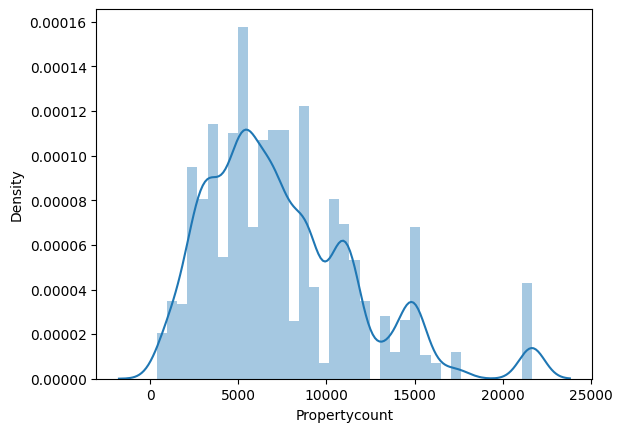

In [26]:
sns.distplot(dataset['Propertycount'])

In [27]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print("Mean = %.3f,Standard Deviation = %.3f" %(sample_mean,sample_std))
    dist=norm(sample_mean,sample_std)
    values=[value for value in range(startrange,endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between the range({},{}):{}".format(startrange,endrange,prob))
    return prob

Mean = 7472.564,Standard Deviation = 4347.924
The area between the range(7000,10000):0.2627615081607156


0.2627615081607156

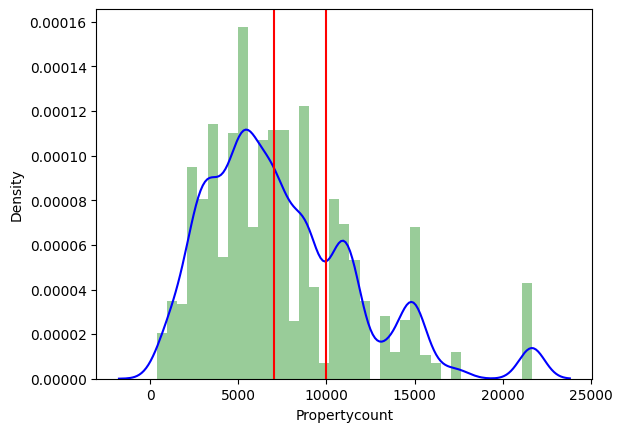

In [28]:
get_pdf_probability(dataset['Propertycount'],7000,10000)

## Cumulative density function

In [29]:
#Cumulative density function'
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['Propertycount'])
ecdf(7000)

0.5470502194051682

## Standard Normal Distribution

In [30]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)

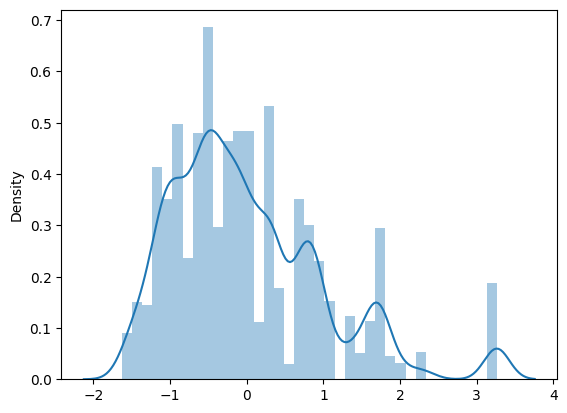

In [31]:
stdNBgraph(dataset['Propertycount'])

In [32]:
dataset.to_csv("Univariate_Pre_melbourn.csv",index=False)

## Bivariate

In [33]:
dataset[quan].cov()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount
Rooms,0.959694,3.439178e+05,1.722535,5.322126e+00,0.917189,0.424762,0.390540,7.880396e+01,-2.386660e+00,-4.329970e+02
Price,343917.780723,4.439381e+11,-607372.984400,6.551427e+06,331960.500367,235007.366669,161945.477979,4.599622e+07,-8.025233e+06,-1.495059e+08
Distance,1.722535,-6.073730e+05,35.051519,2.284581e+02,1.744965,0.540532,1.461945,3.197342e+02,5.469583e+01,-1.797274e+03
Postcode,5.322126,6.551427e+06,228.458105,8.134504e+03,5.572252,6.949071,3.487445,3.070255e+03,1.142013e+02,2.265406e+04
Bedroom2,0.917189,3.319605e+05,1.744965,5.572252e+00,0.953480,0.424893,0.393555,7.741308e+01,-1.936893e+00,-4.209086e+02
Bathroom,0.424762,2.350074e+05,0.540532,6.949071e+00,0.424893,0.496550,0.225141,5.826939e+01,3.961158e+00,-1.930739e+02
Car,0.390540,1.619455e+05,1.461945,3.487445e+00,0.393555,0.225141,0.876134,9.769109e+01,3.936196e+00,-1.604339e+02
Landsize,78.803961,4.599622e+07,319.734204,3.070255e+03,77.413080,58.269386,97.691089,9.866084e+05,1.380352e+03,1.293506e+04
YearBuilt,-2.386660,-8.025233e+06,54.695835,1.142013e+02,-1.936893,3.961158,3.936196,1.380352e+03,1.317890e+03,1.473088e+03
Propertycount,-432.996992,-1.495059e+08,-1797.274172,2.265406e+04,-420.908610,-193.073851,-160.433864,1.293506e+04,1.473088e+03,1.890444e+07


In [34]:
dataset.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [35]:
dataset[quan].corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount
Rooms,1.000000,0.526898,0.296994,0.060236,0.958819,0.615316,0.425906,0.080986,-0.067110,-0.101657
Price,0.526898,1.000000,-0.153972,0.109021,0.510234,0.500540,0.259670,0.069501,-0.331785,-0.051608
Distance,0.296994,-0.153972,1.000000,0.427846,0.301840,0.129565,0.263811,0.054370,0.254484,-0.069820
Postcode,0.060236,0.109021,0.427846,1.000000,0.063272,0.109340,0.041310,0.034272,0.034879,0.057769
Bedroom2,0.958819,0.510234,0.301840,0.063272,1.000000,0.617507,0.430591,0.079815,-0.054640,-0.099140
Bathroom,0.615316,0.500540,0.129565,0.109340,0.617507,1.000000,0.341340,0.083250,0.154846,-0.063017
Car,0.425906,0.259670,0.263811,0.041310,0.430591,0.341340,1.000000,0.105074,0.115838,-0.039421
Landsize,0.080986,0.069501,0.054370,0.034272,0.079815,0.083250,0.105074,1.000000,0.038281,0.002995
YearBuilt,-0.067110,-0.331785,0.254484,0.034879,-0.054640,0.154846,0.115838,0.038281,1.000000,0.009333
Propertycount,-0.101657,-0.051608,-0.069820,0.057769,-0.099140,-0.063017,-0.039421,0.002995,0.009333,1.000000


In [36]:
print(dataset["YearBuilt"].describe())

count    8204.000000
mean     1964.761214
std        36.302748
min      1851.500000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64


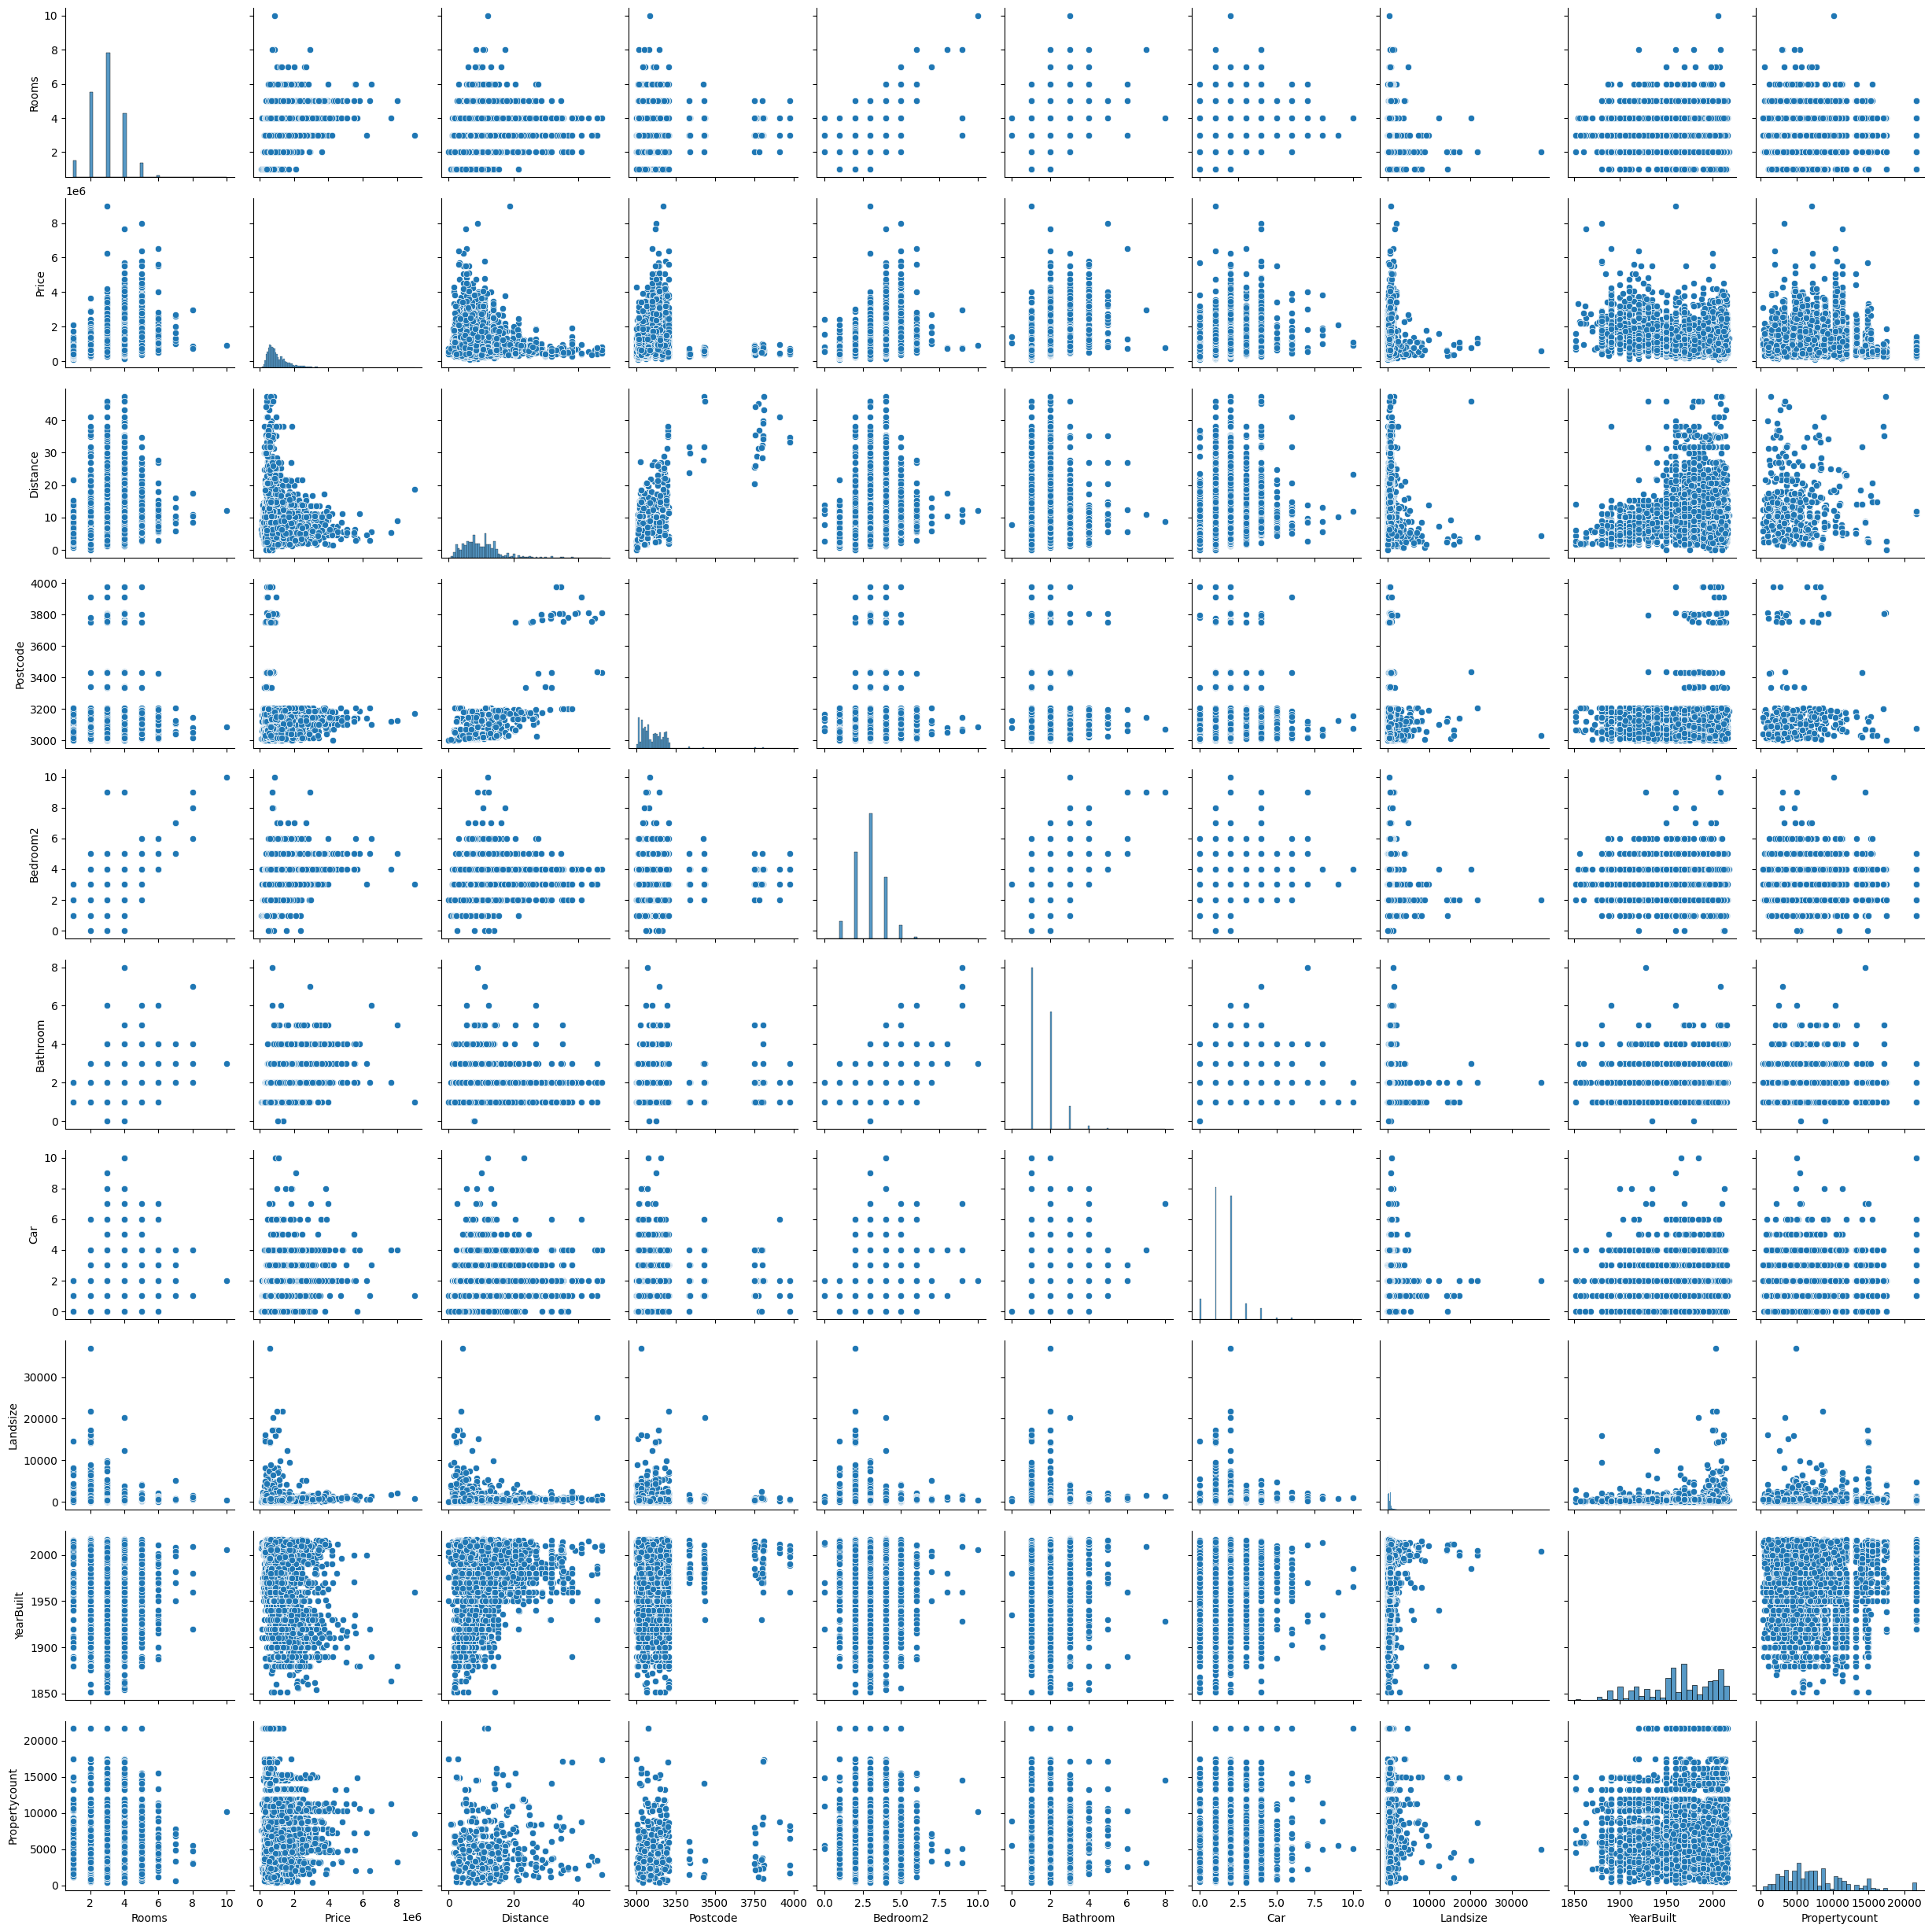

In [36]:
import seaborn as sns
sns.pairplot(dataset)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
def cal_vif(X):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [39]:
quan

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'YearBuilt',
 'Propertycount']

In [40]:
cal_vif(dataset[quan])

,variables,VIF
0,Rooms,128.525407
1,Price,7.624457
2,Distance,6.181239
3,Postcode,1163.578692
4,Bedroom2,125.638736
5,Bathroom,10.886178
6,Car,5.146387
7,Landsize,1.267286
8,YearBuilt,1121.125062
9,Propertycount,4.042130


In [41]:
cal_vif(dataset[['Price','Distance','Bedroom2','Bathroom','Car','Landsize','YearBuilt','Propertycount']])

,variables,VIF
0,Price,6.068222
1,Distance,5.167348
2,Bedroom2,21.353653
3,Bathroom,10.647050
4,Car,5.022067
5,Landsize,1.267148
6,YearBuilt,15.382690
7,Propertycount,4.001796


In [42]:
cal_vif(dataset[['Price','Distance','Bathroom','Car','Landsize','YearBuilt','Propertycount']])

,variables,VIF
0,Price,5.189427
1,Distance,4.586650
2,Bathroom,8.944752
3,Car,4.834733
4,Landsize,1.267113
5,YearBuilt,13.291445
6,Propertycount,3.993344


In [43]:
cal_vif(dataset[['Price','Distance','Bathroom','Car','Landsize','Propertycount']])

,variables,VIF
0,Price,4.930062
1,Distance,3.751104
2,Bathroom,7.953746
3,Car,4.734747
4,Landsize,1.264800
5,Propertycount,2.788618


In [44]:
cal_vif(dataset[['Price','Distance','Car','Landsize','Propertycount']])

,variables,VIF
0,Price,3.131404
1,Distance,3.278739
2,Car,4.445397
3,Landsize,1.262408
4,Propertycount,2.691926


In [45]:
dataset

,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,1035000.0,4/02/2016,2.5,3067,2.0,1.0,0,156.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,3,h,1465000.0,4/03/2017,2.5,3067,3.0,2.0,0,134.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,4,h,1600000.0,4/06/2016,2.5,3067,3.0,1.0,2,120.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,3,h,1876000.0,7/05/2016,2.5,3067,4.0,2.0,0,245.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,2,h,1636000.0,8/10/2016,2.5,3067,2.0,1.0,2,256.0,1890.0,Yarra,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8199,Wheelers Hill,4,h,1245000.0,26/08/2017,16.7,3150,4.0,2.0,2,652.0,1981.0,Melbourne,South-Eastern Metropolitan,7392
8200,Williamstown,3,h,1031000.0,26/08/2017,6.8,3016,3.0,2.0,2,333.0,1995.0,Melbourne,Western Metropolitan,6380
8201,Williamstown,3,h,1170000.0,26/08/2017,6.8,3016,3.0,2.0,4,436.0,1997.0,Melbourne,Western Metropolitan,6380
8202,Williamstown,4,h,2500000.0,26/08/2017,6.8,3016,4.0,1.0,5,866.0,1920.0,Melbourne,Western Metropolitan,6380


In [46]:
dataset['Type'].value_counts()

Type
h    5408
u    2035
t     761
Name: count, dtype: int64

In [47]:
#Different types of houses have significantly different prices?
from scipy.stats import ttest_ind
dataset=dataset.dropna()
type_h=dataset[dataset['Type']=='h']['Price']
type_u=dataset[dataset['Type']=='u']['Price']
ttest_ind(type_h,type_u)

TtestResult(statistic=41.68255196911284, pvalue=0.0, df=7441.0)

In [48]:
# There is significant different between 'h' anf 'u' type houses
#Reject Null Hypothesis When p<0.05
#Here pvalue is lesser than the specified value. Hence we are rejecting the null hypothesis and accepting the alternate hypothesis.

In [49]:
dataset['Regionname'].value_counts()

Regionname
Southern Metropolitan         2902
Northern Metropolitan         2379
Western Metropolitan          1772
Eastern Metropolitan           828
South-Eastern Metropolitan     242
Eastern Victoria                31
Northern Victoria               27
Western Victoria                23
Name: count, dtype: int64

In [50]:
#Different Western Metropolitan Regions and South-Eastern Metropolitan Regions have significant difference in price
from scipy.stats import ttest_ind
dataset=dataset.dropna()
West=dataset[dataset['Regionname']=='Western Metropolitan']['Price']
South=dataset[dataset['Regionname']=='South-Eastern Metropolitan']['Price']
ttest_ind(West,South)

TtestResult(statistic=-1.980829897647602, pvalue=0.04774632947530205, df=2012.0)

In [51]:
# There is significant different between 'Western Metropolitan and South-Eastern Metropolitan Region houses
#Reject Null Hypothesis When p<0.05
#Here pvalue is lesser than the specified value. Hence we are rejecting the null hypothesis and accepting the alternate hypothesis.

In [52]:
#Different Southern  Metropolitan Regions and Northern  Metropolitan Regions have significant difference in price
from scipy.stats import ttest_ind
dataset=dataset.dropna()
North=dataset[dataset['Regionname']=='Northern Metropolitan']['Price']
South=dataset[dataset['Regionname']=='Southern Metropolitan']['Price']
ttest_ind(North,South)

TtestResult(statistic=-25.320386304448267, pvalue=1.3521195374957732e-133, df=5279.0)

In [53]:
# There is no significant different between 'Western Metropolitan and South-Eastern Metropolitan Region houses
#Reject Null Hypothesis When p<0.05
#Here pvalue is greater than the specified value. Hence we are accepting the null hypothesis and rejecting the alternate hypothesis.

In [54]:
#Difference between No of Rooms in the houses and the price value of the house?
import scipy.stats as stats
stats.f_oneway(dataset['Rooms'],dataset['Price'])

F_onewayResult(statistic=20993.465083561932, pvalue=0.0)

In [55]:
# There is significant different between Rooms and price of the houses
#Reject Null Hypothesis When p<0.05
#Here pvalue is lesser than the specified value. Hence we are rejecting the null hypothesis and accepting the alternate hypothesis.

In [56]:
#Test the similarity between land size and price 

In [57]:
import scipy.stats as stats
stats.f_oneway(dataset['Landsize'],dataset['Price'])

F_onewayResult(statistic=20974.078281366335, pvalue=0.0)

In [58]:
# There is significant different between Landsize and price of the houses
#Reject Null Hypothesis When p<0.05
#Here pvalue is lesser than the specified value. Hence we are rejecting the null hypothesis and accepting the alternate hypothesis.

In [59]:
#Test the similarity between YearBuilt and Price
import scipy.stats as stats
stats.f_oneway(dataset['YearBuilt'],dataset['Price'])

F_onewayResult(statistic=20916.253108651297, pvalue=0.0)

In [60]:
# There is significant different between Yearbuilt and price of the houses
#Reject Null Hypothesis When p<0.05
#Here pvalue is lesser than the specified value. Hence we are rejecting the null hypothesis and accepting the alternate hypothesis.

In [61]:
#5) Test the similarities between distance,Bedroom2 and price of the house?
import scipy.stats as stats
stats.f_oneway(dataset['Distance'],dataset['Bedroom2'],dataset['Price'])

F_onewayResult(statistic=20993.326192945475, pvalue=0.0)

In [62]:
# There is significant different between all the three columns said above
#Reject Null Hypothesis When p<0.05
#Here pvalue is lesser than the specified value. Hence we are rejecting the null hypothesis and accepting the alternate hypothesis.

In [66]:
#Test Wheather the distance and Landsize is affecting the price value?
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
formula='Price ~ C(Distance) + C(Landsize) + C(Distance):C(Landsize)'
model = ols(formula, data=dataset).fit() 
sm.stats.anova_lm(model, type=2) 

MemoryError: Unable to allocate 15.0 GiB for an array with shape (244926, 8204) and data type float64

In [ ]:
#Test wheather the Landsize and Yearbuilt is affecting the price value

In [65]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
formula='Price ~ C(YearBuilt) + C(Landsize) + C(YearBuilt):C(Landsize)'
model = ols(formula, data=dataset).fit() 
sm.stats.anova_lm(model, type=2) 

MemoryError: Unable to allocate 10.7 GiB for an array with shape (8204, 175654) and data type float64